In [8]:
%matplotlib inline
%run /Users/marisa/git/practice/Sampler.py
import pystan
import matplotlib.pyplot as plt

/Users/marisa/miniconda3/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2712: DtypeWarning: Columns (19,25,26,27,28,29,35,36,41,42,43,48,49,51,53,55,56,58,59,60,62,63,117,119) have mixed types. Specify dtype option on import or set low_memory=False.
  self.compile if shell_futures else None)


In [3]:
# exponential with a gamma prior on lambda
stanProgram =\
    '''
    data {
        int<lower=1> N; // number of points
        vector[N] x; // data that we will fit the exp distr to
    }

    parameters {
        real<lower=0> lam;
    }

    model {
        lam ~ gamma(1, 1);
        x ~ exponential(lam);
    }
    '''

In [4]:
df2 = getAndCleanPrecip()
df2.shape

/Users/marisa/miniconda3/envs/py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (19,25,26,27,28,29,35,36,41,42,43,48,49,51,53,55,56,58,59,60,62,63,117,119) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


(3285, 2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4113d25e1722b4e81516f4d88785e464 NOW.


/Users/marisa/miniconda3/envs/py3.6/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/13/4yll5w250b517sflm0f07_340000gn/T/tmppom2gjwf/stanfit4anon_model_4113d25e1722b4e81516f4d88785e464_6991216369887957270.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_4113d25e1722b4e81516f4d88785e464.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lam    9.15  6.1e-3   0.16   8.84   9.04   9.15   9.25   9.47    685    1.0
lp__ 3988.0    0.03   0.75 3985.8 3987.8 3988.3 3988.4 3988.5    752    1.0

Samples were drawn using NUTS at Thu Mar 28 13:08:15 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


NameError: name 'plt' is not defined

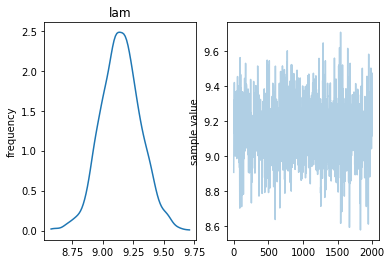

In [6]:
exp_dat = {'N': df2.shape[0],
           'x': df2['precipNum']
           }

sm = pystan.StanModel(model_code = stanProgram)
fit = sm.sampling(data=exp_dat, iter=1000, chains=4)
print(fit.stansummary())


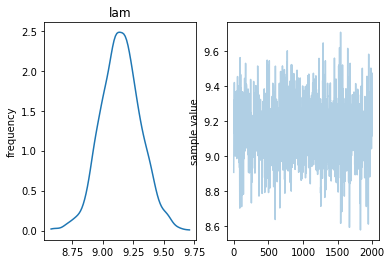

In [13]:
fit.plot()
plt.show()

la = fit.extract(permuted=True)  # return a dictionary of arrays
lam = la['lam']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [14]:
print(1/lam)

[0.11037038 0.10741808 0.10938793 ... 0.10919783 0.11167962 0.11201851]
